## 앙상블 학습과 랜덤 포레스트
## 7.1 투표 기반 분류기
- 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는 것

> 직접투표: 다수결 투표로 정해지는 분류기

> 간접투표: 개별 분류기의 예측을 평균을 내어 확률이 가장 높은 클래스 예측, 확률이 높은 투표에 비중을 더 두기 때문에 직접 투표 방식보다 성능이 높음
- 앙상블 방법은 예측기가 가능한 서로 독립적일 때 최고의 성능을 발휘
- 다양한 분류기를 얻는 방법은 각기 다른 알고리즘으로 학습시키는 것

In [12]:
from sklearn.datasets import make_moons
X,y=make_moons(noise=0.15)

In [13]:
from sklearn.model_selection import train_test_split
X,y = make_moons( noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()
voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='hard')
# voting=soft로 바꿔서 간접투표방식 채택
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [15]:
# 테스트셋 정확도 확인
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.95
SVC 1.0
VotingClassifier 1.0


## 7.2 배깅과 페이스팅
>배깅: 훈련세트에서 중복을 허용하여 샘플링하는 방식

>페이스팅: 중복을 허용하지 않고 샘플링하는 방식

일반적으로 앙상블의 결과는 원본 데이터셋으로 하나이 예측기를 훈련시킬 때와 비교해 편향은 비슷하지만 분산은 줄어듦

## 7.2.1 사이킷런의 배깅과 페이스팅

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    bootstrap=True,n_jobs=-1)
# 페이스팅을 사용하려면 bootstrap=False
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

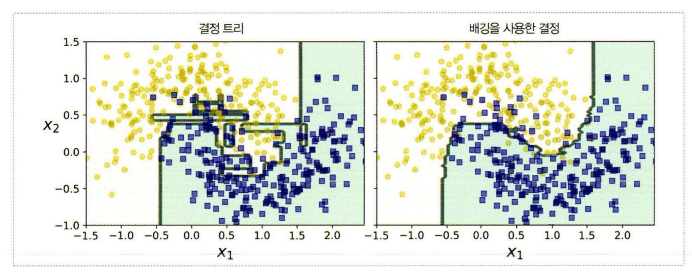

## 7.2.2 oob 평가

BaggingClassifier은 중복을 허용하여 bootstrap=True 훈련세트의 크기만큼 샘플을 선택하고 선택되지 않은 훈련 샘플의 나머지 데이터를 oob(out of bag) 샘플이라고 함

예측기마다 남겨진 oob 샘플은 모두 다름

In [17]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    bootstrap=True,n_jobs=-1,oob_score=True) # 훈련이 끝난 후 자동으로 oob 평가
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.95

In [18]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)
# 비슷한 결과

0.9

In [19]:
bag_clf.oob_decision_function_

array([[0.00526316, 0.99473684],
       [1.        , 0.        ],
       [0.04216867, 0.95783133],
       [0.44382022, 0.55617978],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.04907975, 0.95092025],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04736842, 0.95263158],
       [0.34759358, 0.65240642],
       [1.        , 0.        ],
       [0.01169591, 0.98830409],
       [0.        , 1.        ],
       [0.4021164 , 0.5978836 ],
       [0.10497238, 0.89502762],
       [0.04918033, 0.95081967],
       [0.89690722, 0.10309278],
       [0.90555556, 0.09444444],
       [0.00529101, 0.99470899],
       [0.99411765, 0.00588235],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.29310345, 0.70689655],
       [1.        , 0.        ],
       [0.96491228, 0.03508772],
       [1.        , 0.        ],
       [0.00531915, 0.99468085],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

## 7.3 랜덤패치와 랜덤 서브스페이스

고차원의 데이터셋을 다룰 때 유리
- 랜덤 패치 방식: 훈련 특성과 샘플을 모두 샘플링하는 것

-  랜덤 서브스페이스 방식: 훈련 샘플을 모두 사용하고 특성은 샘플링하는 것

## 7.4 랜덤 포레스트



In [20]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rf=rnd_clf.predict(X_test)

In [21]:
# Bagging Classifier로 앞의 RandomForestClassifier와 유사하게 만든 것
bag_clf=BaggingClassifier(
DecisionTreeClassifier(max_features='auto',max_leaf_nodes=16),
n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1)

## 7.4.1 엑스트라 트리
트리를 더욱 무작위하게 만들기 위해 최적의 임곗값 대신 후보 특성을 사용해 무작위로 분할한 다음 그중에서 최상의 분할 선택

편향이 늘어나지만 분산을 낮출 수 있게 됨

sklearn의 ExtraTreeClassifier 사용할 것

## 7.4.2 특성 중요도
가중치 평균. 각 노드의 가중치는 연관된 훈련 샘플 수와 같음

In [24]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.09633731289583523
sepal width (cm) 0.024641678959646737
petal length (cm) 0.4419239308217796
petal width (cm) 0.4370970773227385


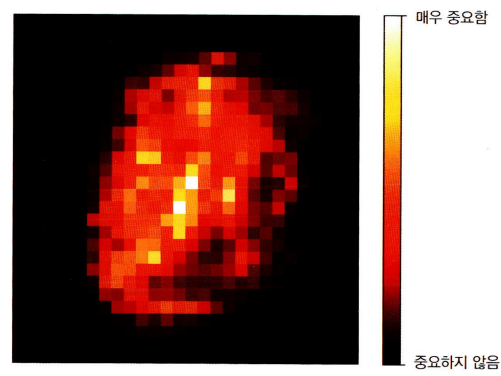

## 7.5 부스팅

약한 학습기 여러개를 연결하여 강한 학습기를 만드는 앙상블 방법
## 7.5.1 에이다부스트

이전 모델이 과소적함했던 훈련 샘플의 가중치를 높이는 것

In [28]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=200,
    algorithm='SAMME.R',learning_rate=0.5)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

## 7.5.2 그래디언트 부스팅
앙상블 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가함

에이다부스트처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 예측기가 만들어낸 잔여오차를 새로운 예측기에 학습시킴

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [32]:
# 첫번째 예측기에서 생긴 잔여오차에 두번째 예측기에 훈련시킴
y2=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

In [34]:
y3=y-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)
y_pred=sum(tree.predict(X_test) for tree in (tree_reg1,tree_reg2,tree_reg3))

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_val,y_train,y_val=train_test_split(X,y)
gbrt=GradientBoostingRegressor(max_depth=2)
gbrt.fit(X_train,y_train)
errors=[mean_squared_error(y_val,y_pred)
        for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators=np.argmin(errors)+1
gbrt_best=GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=99)

In [40]:
gbrt=GradientBoostingRegressor(max_depth=2,warm_start=True)
min_val_error=float('inf')
error_going_up=0
for n_estimators in range(1,120):
    gbrt.n_estimators=n_estimators
    gbrt.fit(X_train,y_train)
    y_pred=gbrt.predict(X_val)
    val_error=mean_squared_error(y_val,y_pred)
    if val_error<min_val_error:
        min_val_error=val_error
        error_going_up=0
    else:
        error_going_up+=1
        if error_going_up==5:
            break

In [43]:
import xgboost
xgb_reg=xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
y_pred=xgb_reg.predict(X_val)

In [45]:
xgb_reg.fit(X_train,y_train,
           eval_set=[(X_val,y_val)],early_stopping_rounds=2)
y_pred=xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.39134
[1]	validation_0-rmse:0.32758
[2]	validation_0-rmse:0.29432
[3]	validation_0-rmse:0.27943
[4]	validation_0-rmse:0.27694
[5]	validation_0-rmse:0.26086
[6]	validation_0-rmse:0.25054
[7]	validation_0-rmse:0.24385
[8]	validation_0-rmse:0.23951
[9]	validation_0-rmse:0.23843
[10]	validation_0-rmse:0.23775
[11]	validation_0-rmse:0.23731
[12]	validation_0-rmse:0.23684
[13]	validation_0-rmse:0.23665
[14]	validation_0-rmse:0.23640
[15]	validation_0-rmse:0.23655
[16]	validation_0-rmse:0.23667


C:\Users\MYCOM\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


## 7.6 스태킹
앙상블에 속한 모든 예측기의 예측을 취합하는 간단한 함수 대신 취합하는 모델을 훈련

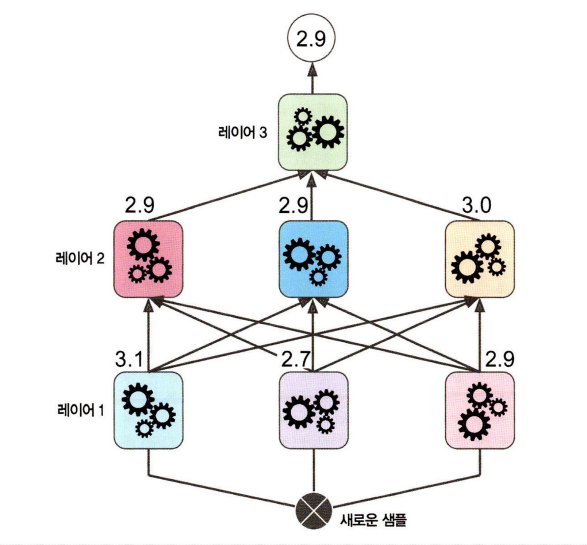